In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import os 

spring_flow_df = pd.read_csv('Station CSVs\BIG SPRINGS CREEK-9569-2009-2024.csv')
#Station CSVs\BIG SPRINGS CREEK-9569-2009-2024.csv"

spring_flow_df

,Station ID,Station Name,Date,Flow
0,9569,BIG SPRINGS CREEK ABV. DEARDEN RANCH,9/21/09,0.660559
1,9569,BIG SPRINGS CREEK ABV. DEARDEN RANCH,9/22/09,0.660559
2,9569,BIG SPRINGS CREEK ABV. DEARDEN RANCH,9/23/09,0.660559
3,9569,BIG SPRINGS CREEK ABV. DEARDEN RANCH,9/24/09,2.757264
4,9569,BIG SPRINGS CREEK ABV. DEARDEN RANCH,9/25/09,7.474518
...,...,...,...,...
5042,9569,BIG SPRINGS CREEK ABV. DEARDEN RANCH,8/14/24,3.327005
5043,9569,BIG SPRINGS CREEK ABV. DEARDEN RANCH,8/15/24,3.496064
5044,9569,BIG SPRINGS CREEK ABV. DEARDEN RANCH,8/16/24,6.809367
5045,9569,BIG SPRINGS CREEK ABV. DEARDEN RANCH,8/17/24,6.465635


In [7]:
spring_flow_df.dtypes

Station ID        int64
Station Name     object
Date             object
Flow            float64
dtype: object

In [20]:
Q1 = spring_flow_df['Flow'].quantile(0.25)
Q3 = spring_flow_df['Flow'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
spring_df_cleaned = spring_flow_df[(spring_flow_df['Flow'] >= lower_bound) & (spring_flow_df['Flow'] <= upper_bound)]
spring_df_cleaned

,Station ID,Station Name,Date,Flow
4,9569,BIG SPRINGS CREEK ABV. DEARDEN RANCH,9/25/09,7.474518
5,9569,BIG SPRINGS CREEK ABV. DEARDEN RANCH,9/26/09,7.495807
6,9569,BIG SPRINGS CREEK ABV. DEARDEN RANCH,9/27/09,7.799033
7,9569,BIG SPRINGS CREEK ABV. DEARDEN RANCH,9/28/09,7.512018
8,9569,BIG SPRINGS CREEK ABV. DEARDEN RANCH,9/29/09,7.180082
...,...,...,...,...
5040,9569,BIG SPRINGS CREEK ABV. DEARDEN RANCH,8/12/24,9.546999
5041,9569,BIG SPRINGS CREEK ABV. DEARDEN RANCH,8/13/24,7.351233
5044,9569,BIG SPRINGS CREEK ABV. DEARDEN RANCH,8/16/24,6.809367
5045,9569,BIG SPRINGS CREEK ABV. DEARDEN RANCH,8/17/24,6.465635


In [10]:
spring_df_cleaned.describe()

,Station ID,Flow
count,4634.0,4634.000000
mean,9569.0,8.662008
std,0.0,1.559952
min,9569.0,4.191117
25%,9569.0,7.625374
50%,9569.0,8.581914
75%,9569.0,9.547484
max,9569.0,12.734145


In [11]:
spring_flow_df.describe()

,Station ID,Flow
count,5047.0,5047.000000
mean,9569.0,8.331056
std,0.0,2.246225
min,9569.0,0.000000
25%,9569.0,7.394364
50%,9569.0,8.480564
75%,9569.0,9.531924
max,9569.0,18.636632


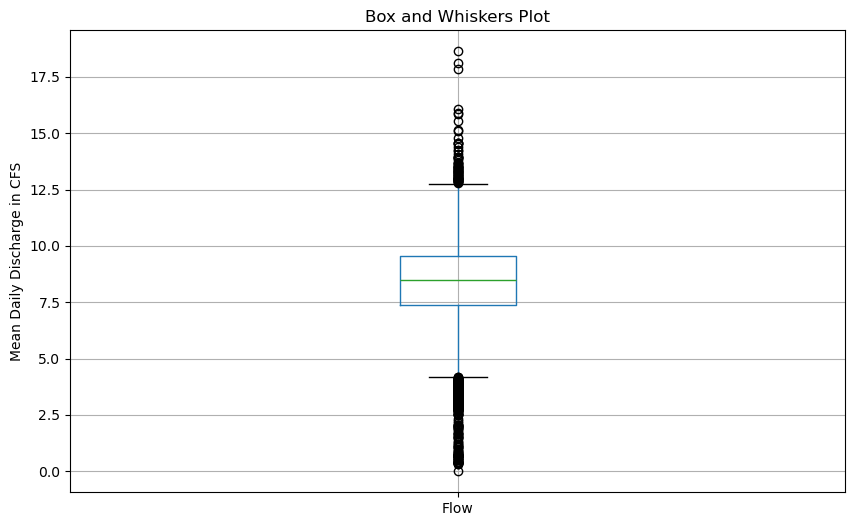

In [18]:
#Unreduced Data
plt.figure(figsize=(10, 6)) 

spring_flow_df.boxplot(column='Flow') 

# Replace 'ColumnName' with the actual column name you want to plot 
plt.title('Box and Whiskers Plot') 
plt.ylabel('Mean Daily Discharge in CFS') 
plt.grid(True) 
plt.show()

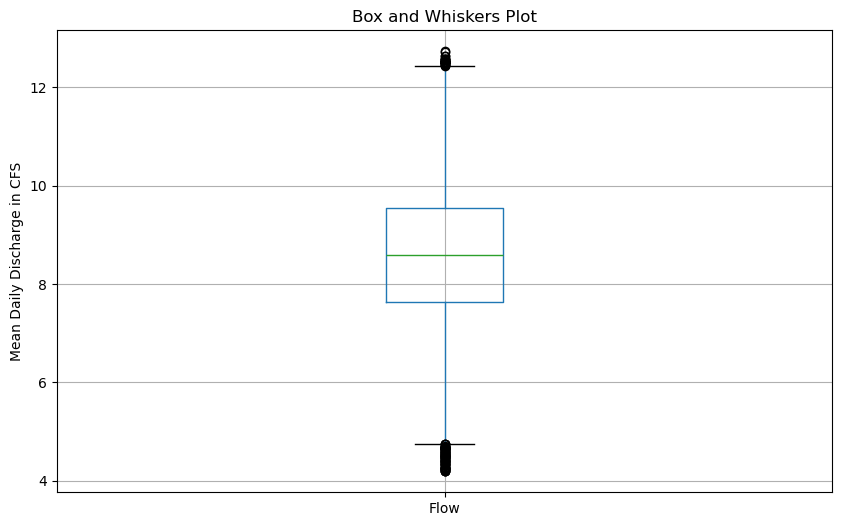

In [21]:
#Reduced Data
plt.figure(figsize=(10, 6)) 

spring_df_cleaned.boxplot(column='Flow') 

# Replace 'ColumnName' with the actual column name you want to plot 
plt.title('Box and Whiskers Plot') 
plt.ylabel('Mean Daily Discharge in CFS') 
plt.grid(True) 
plt.show()

In [27]:
csv_folder = 'Station CSVs'

all_spring_data = ['BIG SPRINGS CREEK-9569-2009-2024.csv',
                  'FOOTE RESERVOIR SPRING-9595-2010-2024.csv',
                  'KELL SPRING-9573-2009-2024.csv',
                  'MILLER SPRING-9600-2010-2024.csv',
                  'PIVOT PUMP-9574-2009-2024.csv',
                  'TWIN SPRINGS (NORTH)-9599-2009-2024.csv',
                  'TWIN SPRINGS (SOUTH)-9589-2010-2024.csv',
                  'CLAY SPRINGS-9572-2009-2024.csv']

def clean_data(df):
    Q1 = df['Flow'].quantile(0.25)
    Q3 = df['Flow'].quantile(0.75)
    IQR = Q3 - Q1

    df_cleaned = df[(df['Flow'] >= (Q1 - 1.5 * IQR)) & (df['Flow'] <= (Q3 + 1.5 * IQR))]

    return df_cleaned

cleaned_dfs = {}

for csv_file in all_spring_data:
    file_path = os.path.join(csv_folder,csv_file)

    df = pd.read_csv(file_path)

    df_cleaned = clean_data(df)
    
    cleaned_dfs[csv_file.split('.')[0]] = df_cleaned
    
for key, cleaned_df in cleaned_dfs.items():
    print(f"DataFrame for {key}:")
    print(cleaned_df.head())

DataFrame for BIG SPRINGS CREEK-9569-2009-2024:
   Station ID                          Station Name     Date      Flow
4        9569  BIG SPRINGS CREEK ABV. DEARDEN RANCH  9/25/09  7.474518
5        9569  BIG SPRINGS CREEK ABV. DEARDEN RANCH  9/26/09  7.495807
6        9569  BIG SPRINGS CREEK ABV. DEARDEN RANCH  9/27/09  7.799033
7        9569  BIG SPRINGS CREEK ABV. DEARDEN RANCH  9/28/09  7.512018
8        9569  BIG SPRINGS CREEK ABV. DEARDEN RANCH  9/29/09  7.180082
DataFrame for FOOTE RESERVOIR SPRING-9595-2010-2024:
   Station ID            Station Name     Date      Flow
0        9595  FOOTE RESERVOIR SPRING  9/22/10  1.284975
1        9595  FOOTE RESERVOIR SPRING  9/23/10  1.278689
2        9595  FOOTE RESERVOIR SPRING  9/24/10  1.278689
3        9595  FOOTE RESERVOIR SPRING  9/25/10  1.277889
4        9595  FOOTE RESERVOIR SPRING  9/26/10  1.278689
DataFrame for KELL SPRING-9573-2009-2024:
   Station ID Station Name      Date      Flow
0        9573  KELL SPRING  11/17/09  0.11

In [49]:
clay_spring_df = cleaned_dfs['CLAY SPRINGS-9572-2009-2024']
clay_spring_df.to_csv('clay_spring_cleaned.csv')

In [43]:
big_spring_df = cleaned_dfs['BIG SPRINGS CREEK-9569-2009-2024']
big_spring_df.to_csv('big_spring_cleaned.csv')

In [44]:
foote_reservoir_df = cleaned_dfs['FOOTE RESERVOIR SPRING-9595-2010-2024']
foote_reservoir_df.to_csv('foot_reservior_cleaned.csv')

In [45]:
kell_spring_df = cleaned_dfs['KELL SPRING-9573-2009-2024']
kell_spring_df.to_csv('kell_spring_cleaned.csv')

In [46]:
pivot_pump_df = cleaned_dfs['PIVOT PUMP-9574-2009-2024']
pivot_pump_df.to_csv('pivot_pump_cleaned.csv')

In [47]:
twin_springs_north_df = cleaned_dfs['TWIN SPRINGS (NORTH)-9599-2009-2024']
twin_springs_north_df.to_csv('twin_springs_N_cleaned.csv')

In [48]:
twin_springs_south_df = cleaned_dfs['TWIN SPRINGS (SOUTH)-9589-2010-2024']
twin_springs_south_df.to_csv('twin_springs_S_cleaned.csv')

In [50]:
miller_spring_df = cleaned_dfs['MILLER SPRING-9600-2010-2024']
miller_spring_df.to_csv('miller_spring_cleaned.csv')